In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

pd.set_option('display.max_columns', None)
PlayerDF = pd.read_csv('..\Player_Data\Cleaned_Player_Data.csv', index_col = 0)

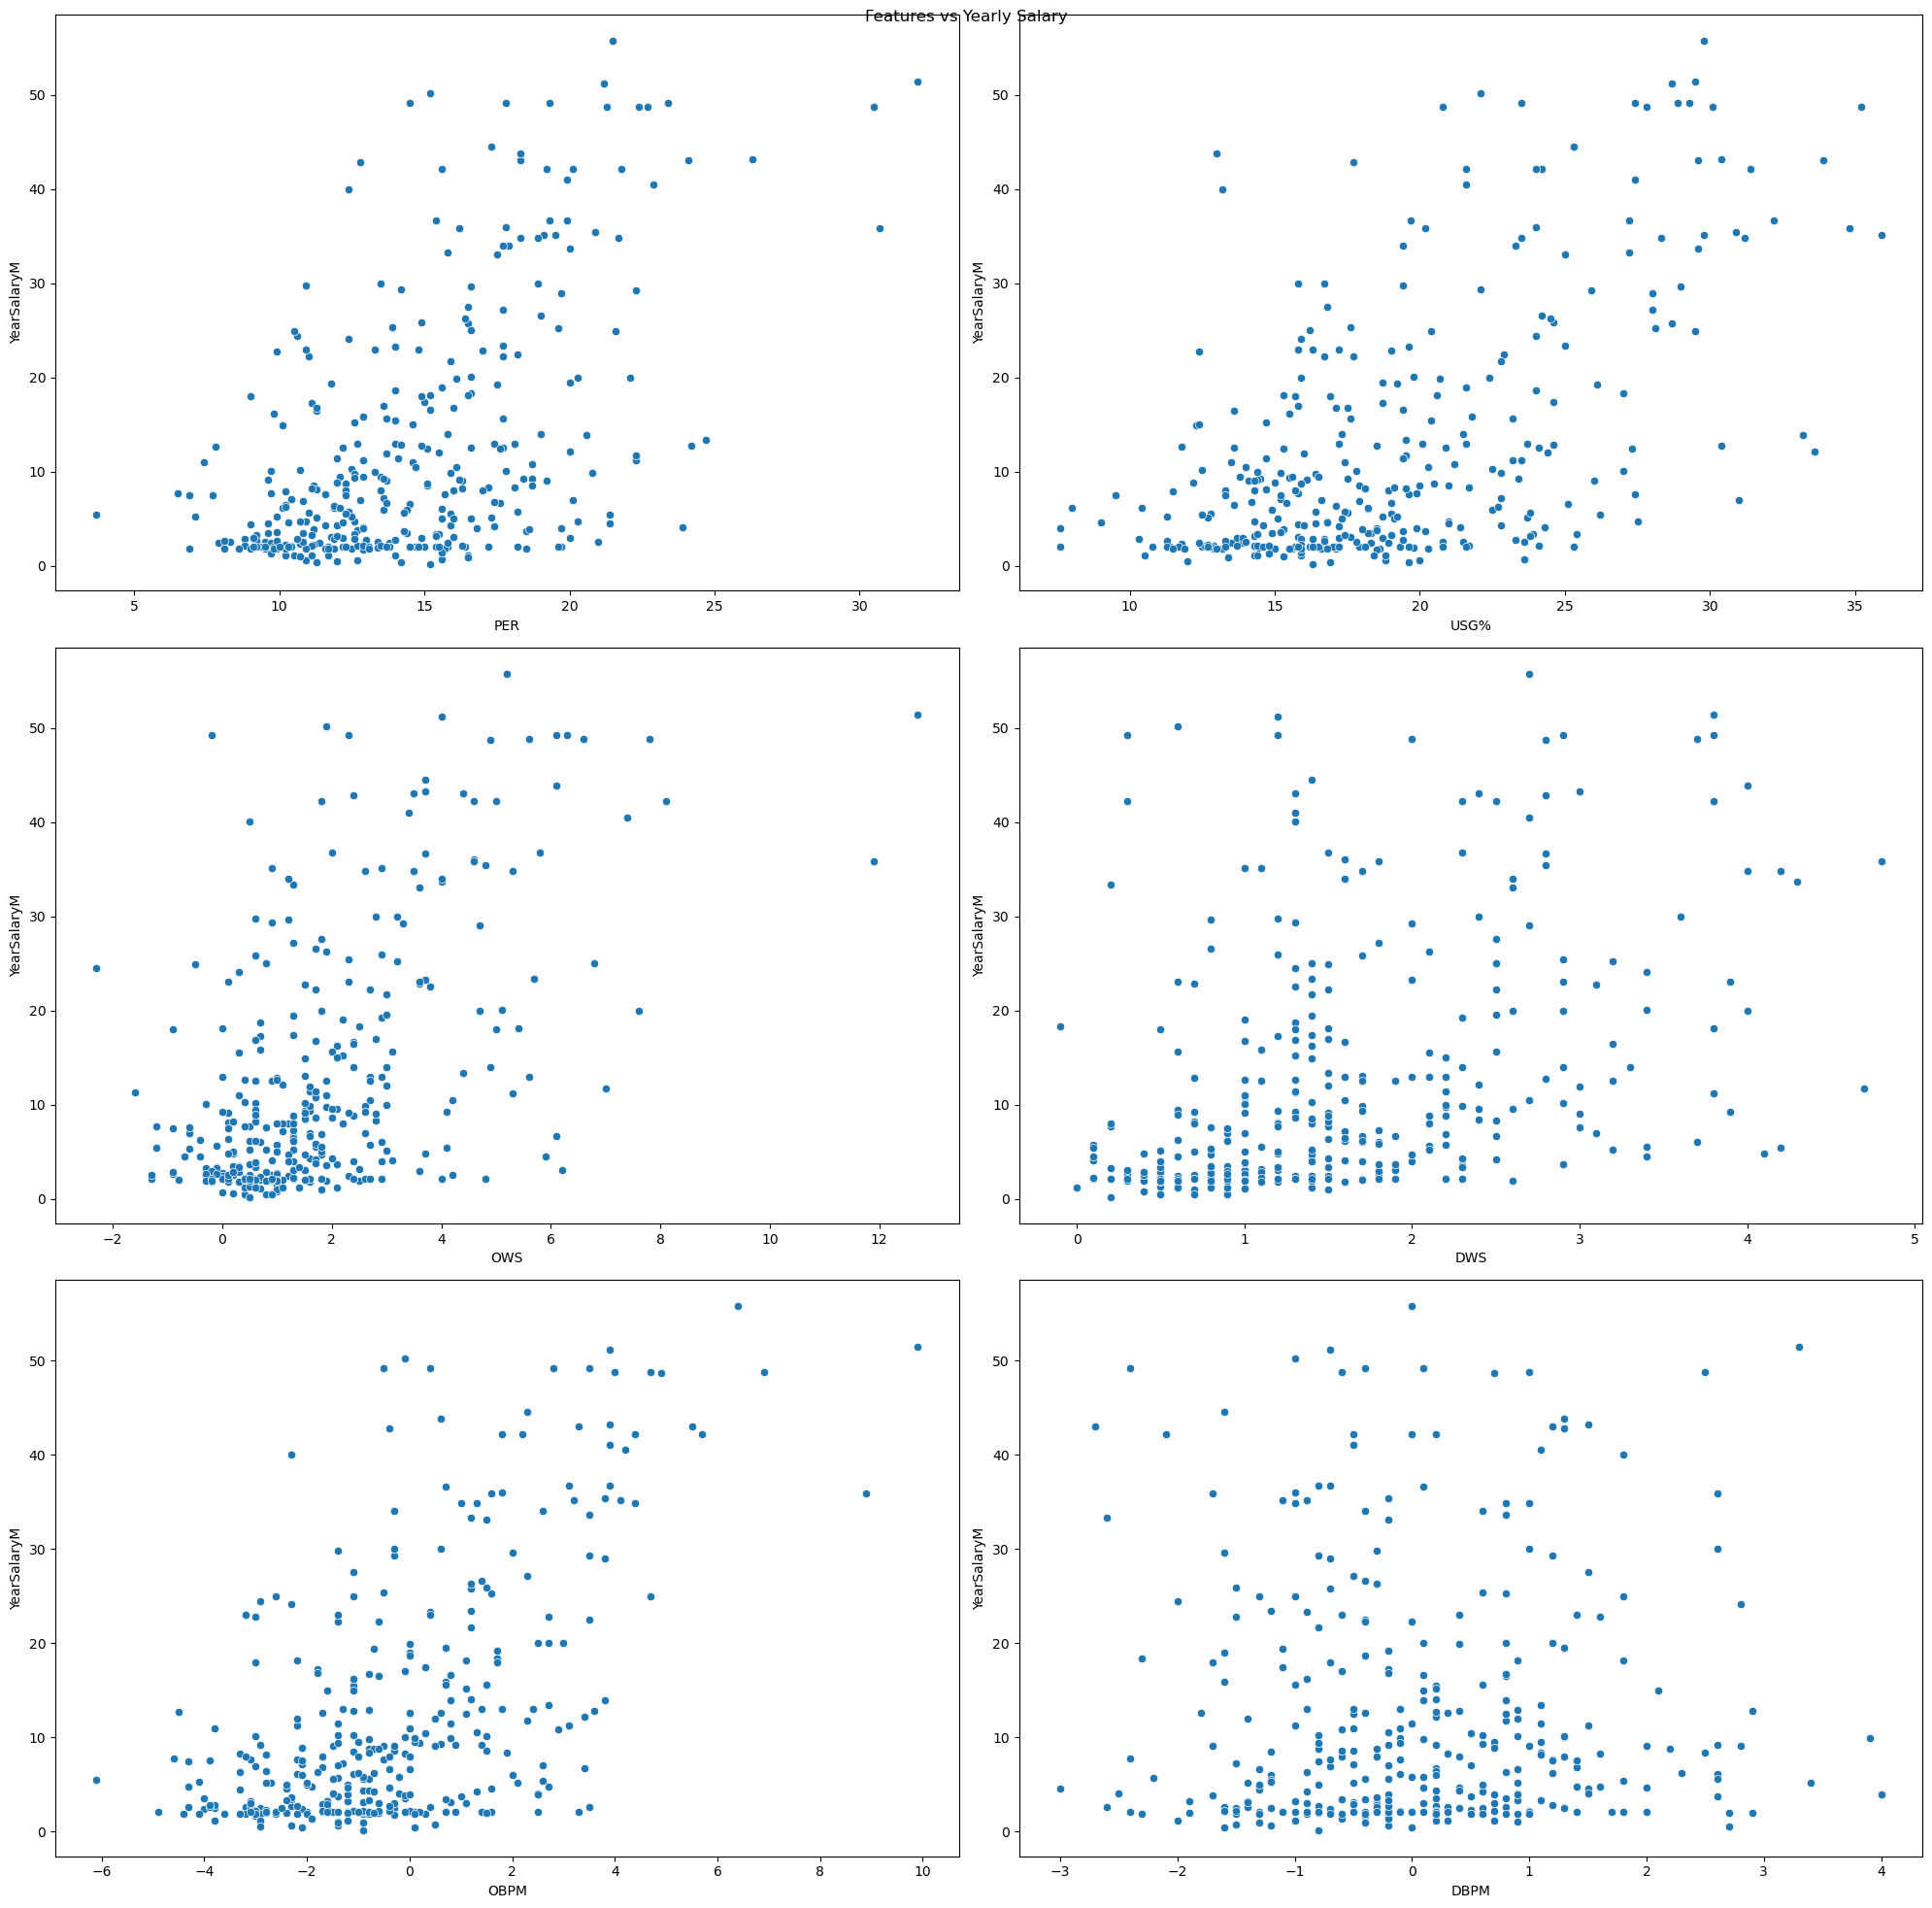

In [2]:
fig, ax = plt.subplots(3,2, figsize = (20,20))
sns.scatterplot(data = PlayerDF, x= 'PER', y = 'YearSalaryM', ax = ax[0][0])
sns.scatterplot(data = PlayerDF, x = 'USG%', y = 'YearSalaryM', ax = ax[0][1])
sns.scatterplot(data = PlayerDF, x = 'OWS', y= 'YearSalaryM', ax = ax[1][0])
sns.scatterplot(data = PlayerDF, x = 'DWS', y= 'YearSalaryM', ax = ax[1][1])
sns.scatterplot(data = PlayerDF, x = 'OBPM', y = 'YearSalaryM',ax = ax[2][0])
sns.scatterplot(data = PlayerDF, x = 'DBPM', y = 'YearSalaryM',ax = ax[2][1])
fig.suptitle('Features vs Yearly Salary')
plt.tight_layout()

In [3]:
features = ['PER','OWS','DWS','OBPM','DBPM','Age','GS', 'PTS', 'AST', 'STL', 'BLK','FG%']
target = 'YearSalaryM'
X = PlayerDF[features]
y = PlayerDF[target]

scaler = StandardScaler()
X_scalled = scaler.fit_transform(X)

ridge = RidgeCV(alphas=[0.1,1.0,10.0], cv = 5)
ridge.fit(X_scalled, y)
print('R2:',ridge.score(X_scalled,y))


R2: 0.6561546835054843


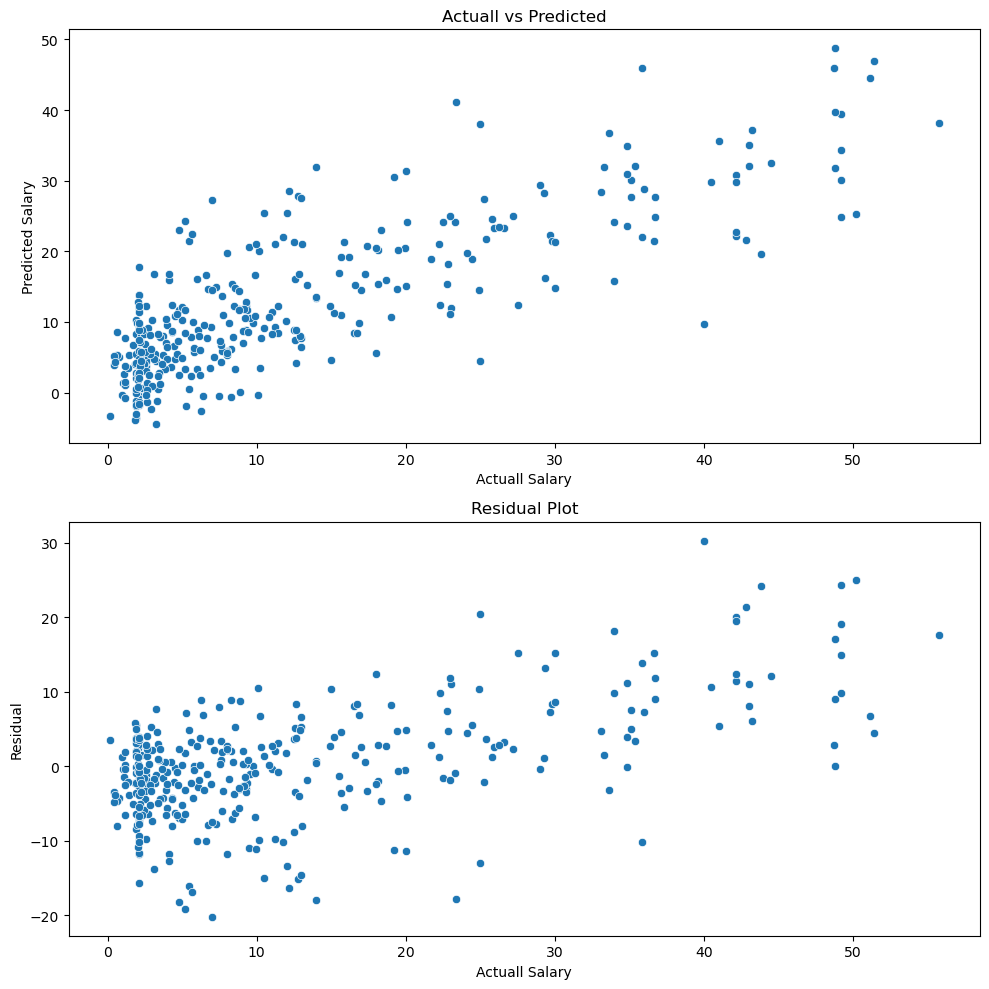

In [4]:
'''
Potential Reasons for less accuracy and larger residuals as the salary increases, is that there is less data for the model to be trained on of players with high salary. 
Therefore, for successful players who bring large contributions to their team, the model is not able to as accurately predict their salary. This is seen from the residual plot
as when the salaries are lower, the residuals are closer to 0, and it spreads out as the salary increases. 
'''

fig, ax = plt.subplots(2,1, figsize = (10,10))

PlayerDF['PredictedSalary'] = ridge.predict(X_scalled)
sns.scatterplot(data = PlayerDF, x = 'YearSalaryM', y = 'PredictedSalary', ax = ax[0])
ax[0].set_xlabel('Actuall Salary')
ax[0].set_ylabel('Predicted Salary')
ax[0].set_title('Actuall vs Predicted')

PlayerDF['residuals'] = PlayerDF['YearSalaryM'] - PlayerDF['PredictedSalary']
sns.scatterplot(data = PlayerDF, x = 'YearSalaryM', y = 'residuals', ax = ax[1])
ax[1].set_xlabel('Actuall Salary')
ax[1].set_ylabel('Residual')
ax[1].set_title("Residual Plot")

plt.tight_layout()
plt.show()

In [11]:
'''
With the list of players, some players are heavily overpaid compared to their performance like bradley beal and ben simmons. These players signed big contracts and saw a large 
dip in performance. Additionally, some players such as Tyrese Haliburton, Jaylen Brown, and Steph Curry, who have had very successfull seasons, are also projected as overpaid due to 
the large size of their contract. The model has less data for players with large contracts and therefore tends to be swayed and calculates larger residuals for these players. 
Although the model is less accurate with players who are paid a lot, many people do think that these players are overpaid and overrated. Jaylen Brown is a second option and 
Tyrese Hailiburton is an inconsistent player are common claims when discussing these players and their huge contracts. 
'''
#Top 20 most overpaid players
PlayerDFOverPaid = PlayerDF.sort_values(by = 'residuals', ascending= False)
PlayerDFOverPaid[['Player','YearSalaryM','PredictedSalary','residuals']].head(20)


,Player,YearSalaryM,PredictedSalary,residuals
295,Ben Simmons,40.012,9.737663,30.274337
67,Bradley Beal,50.204,25.280012,24.923988
74,Paul George,49.206,24.917054,24.288946
124,Rudy Gobert,43.828,19.647498,24.180502
95,Fred VanVleet,42.847,21.549325,21.297675
288,Jonathan Isaac,25.000,4.537525,20.462475
51,Lauri Markkanen,42.176,22.181586,19.994414
54,Tyrese Haliburton,42.176,22.679012,19.496988
28,Jaylen Brown,49.206,30.113970,19.092030
88,Deandre Ayton,34.005,15.825774,18.179226


In [15]:
'''
The trend that I noticed for the most underpaid players is that they seem to be on the two extreme sides of their careers. We are able to see lots of young players who are starting
to turn into superstars but have not yet signed their next contract after their rookie deals. Franz Wagner was just recently only on his rookie deal where he was making around 7 
million a year but has significantly outperformed that seen through this residual. Franz Wagner recently signed a rookie supermax extension. Many of the young players are approaching
large contract extensions due to their significant performance. Additionally players like Chris Paul, Demar DeRozan, and Russell Westrbook are on this list. These are older players
that are still able to bring a spark to a team, but front offices are not willing to invest significant money on them, due to concerns with their age and dip in performance over the 
years. 
'''
#Top 20 most underpaid players
PlayerDFUnderPaid = PlayerDF.sort_values(by = 'residuals', ascending= True)
PlayerDFOverPaid[['Player','YearSalaryM','PredictedSalary','residuals']].tail(20).sort_values(by = 'residuals', ascending= True)


,Player,YearSalaryM,PredictedSalary,residuals
20,Franz Wagner,7.007,27.261341,-20.254341
34,Trey Murphy III,5.160,24.303196,-19.143196
32,Jalen Williams,4.776,23.034117,-18.258117
8,Cade Cunningham,13.941,31.978055,-18.037055
29,DeMar DeRozan,23.400,41.196739,-17.796739
103,Russell Westbrook,5.631,22.474450,-16.843450
10,Paolo Banchero,12.161,28.472519,-16.311519
49,Alperen Şengün,5.425,21.475650,-16.050650
138,Spencer Dinwiddie,2.088,17.761843,-15.673843
19,Victor Wembanyama,12.769,27.900285,-15.131285
